# Proyek Analisis Data: Bike sharing
- **Nama:** YOSUA EBEN HAEZER MOMONGAN
- **Email:** m391b4ky4551@bangkit.academy / yosuamomongan834@gmail.com
- **ID Dicoding:** m391b4ky4551

**Pertanyaan Bisnis**

- Bagaimana performa penyewaan perusahaan dalam beberapa bulan terakhir
- Jam berapa kondisi paling ramai penyewaan baik di hari libur maupun dihari kerja
-bagaiaman hubungan cuaca dengan penyewaan

#mengimport library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

#Data Wragling

memuat tabel hours

In [ ]:
hours_df = pd.read_csv('hour.csv')
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


memuat tabel day

In [ ]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Tabel Hour**

Menampilkan informasi terkait data dari hour.
Dapat dilihat bahwa data dari tabel hour tidak memiliki missing value

In [ ]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


melihat apakah ada data yang duplikat dari tabel hour

In [ ]:
hours_df.duplicated().sum()

0

Parameter statistik dari tabel hour

In [ ]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Tabel Day**

Melihat informasi dari tabel Day

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Data pada tabel Day tidak memimiliki missing value dapat dilihat dari jumlah non-null count nya yang sama dismua kolom

Melihat data yang terduplikasi dari tabel day

In [ ]:
day_df.duplicated().sum()


0

Melihat deskripsi dari data Day

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


setelah melakukan beberapa pengecekan, data yang akan digunakan telah siap untuk dipakai. Tidak terdapat data yang hilang, tidak akurat, dan duplikat

#Exploratory Data Analysis (EDA)

mengeksplorasi tabel hour

In [ ]:
hours_df.groupby('season').agg({"casual":["max","min","mean"], "registered" : ["max","min","mean"], "cnt" :["max","min","mean","std"]})

casual                registered                  cnt                  \
          max min       mean        max min        mean  max min        mean   
season                                                                         
1         367   0  14.290901        681   0   96.823668  801   1  111.114569   
2         361   0  46.160581        782   0  162.183488  957   1  208.344069   
3         350   0  50.287144        886   0  185.729093  977   1  236.016237   
4         362   0  30.666824        876   0  168.202032  967   1  198.868856   

                    
               std  
season              
1       119.224010  
2       188.362473  
3       197.711630  
4       182.967972

In [ ]:
hours_df.groupby('weathersit').agg({"casual":["max","min","mean"], "registered" : ["max","min","mean"], "cnt" :["max","min","mean","std"]})

casual                registered                  cnt      \
              max min       mean        max min        mean  max min   
weathersit                                                             
1             367   0  40.545431        886   0  164.323841  977   1   
2             350   0  29.595290        822   0  145.570202  957   1   
3             263   0  16.055673        791   0   95.523608  891   1   
4               6   1   2.666667        158  22   71.666667  164  23   

                                    
                  mean         std  
weathersit                          
1           204.869272  189.487773  
2           175.165493  165.431589  
3           111.579281  133.781045  
4            74.333333   77.925178

melihat pengaruh kondisi cuaca pada pemesanan sepeda baik yang registrasi, casual dan totalnya.
terdapat perbedaan yang signifikan. informasi angka, sebagai berikut:
-  1: Cerah, sedikit awan, sebagian berawan.
-  2: Kabut + Berawan, Kabut + Awan pecah, Kabut + sedikit awan, Kabut.
-  3: Salju ringan, Hujan ringan + badai petir + awan tersebar, Hujan ringan + awan tersebar.
-  4: Hujan deras + pellet es + badai petir + kabut, Salju + kabut.

In [ ]:
hours_df.groupby('hr').agg({"casual":["max","min","mean"], "registered" : ["max","min","mean"], "cnt" :["max","min","mean","std"]})

casual                registered                  cnt                  \
      max min       mean        max min        mean  max min        mean   
hr                                                                         
0      68   0  10.158402        234   0   43.739669  283   2   53.898072   
1      49   0   6.504144        139   0   26.871547  168   1   33.375691   
2      44   0   4.772028        104   0   18.097902  132   1   22.869930   
3      26   0   2.715925         61   0    9.011478   79   1   11.727403   
4      13   0   1.253945         22   0    5.098996   28   1    6.352941   
5      16   0   1.411437         64   0   18.478382   66   1   19.889819   
6      19   0   4.161379        203   0   71.882759  213   1   76.044138   
7      40   0  11.055021        572   1  201.009629  596   1  212.064649   
8      69   0  21.679505        808   4  337.331499  839   5  359.011004   
9     142   0  30.891334        399   6  188.418157  426  14  219.309491   
10    209   0  46.477304        351   8  127.191197  539   8  173.668501   
11    268   0  59.540578        446   5  148.602476  663  10  208.143054   
12    362   0  68.293956        526   3  185.021978  776   3  253.315934   
13    355   0  72.308642        491   9  181.352538  760  11  253.661180   
14    361   0  75.567901        502  12  165.381344  750  12  240.949246   
15    357   0  74.905350        456   4  176.327846  750   7  251.233196   
16    367   0  73.745205        481   8  238.238356  783  11  311.983562   
17    347   0  74.273973        885  14  387.178082  976  15  461.452055   
18    266   0  61.120879        886  20  364.390110  977  23  425.510989   
19    230   0  48.770604        662  11  262.752747  743  11  311.523352   
20    237   0  36.233516        461   8  189.796703  567  11  226.030220   
21    222   0  28.255495        362   6  144.059066  584   6  172.314560   
22    175   0  22.252747        327   5  109.082418  502   9  131.335165   
23     71   0  15.199176        220   2   72.631868  256   2   87.831044   

                
           std  
hr              
0    42.307910  
1    33.538727  
2    26.578642  
3    13.239190  
4     4.143818  
5    13.200765  
6    55.084348  
7   161.441936  
8   235.189285  
9    93.703458  
10  102.205413  
11  127.495536  
12  145.081134  
13  148.107657  
14  147.271574  
15  144.632541  
16  148.682618  
17  232.656611  
18  224.639304  
19  161.050359  
20  119.670164  
21   89.788893  
22   69.937782  
23   50.846889

melihat iformasi tentang jumlah peminjaman paling banyak dari casual, yang registrasi maupun totalnuya di setiap jamnya, peminjaman minimal dan temperatur maximal di jam tersebut

In [ ]:
workdy = hours_df.groupby('workingday').agg({"casual":["max","min","mean"], "registered" : ["max","min","mean"], "cnt" :["max","min","mean","std"]}).reset_index()
workdy

workingday casual                registered                  cnt      \
                max min       mean        max min        mean  max min   
0          0    367   0  57.441422        601   0  123.963910  783   1   
1          1    264   0  25.561315        886   0  167.646439  977   1   

                           
         mean         std  
0  181.405332  172.853832  
1  193.207754  185.107477

Pada tampilan tersebut akan melihat hubungan antar hari kerja dan tidak kerja dengan peminjaman tota, peminjaman member yang sudah registrasi dan peminjaman taotal.
Dapat dilihat bahwa hari libur dan hari kerja memiliki perbedaan yang signifikan dalam peminjaman

mengeksplorasi tabel day

In [ ]:
day_df.groupby('mnth').agg({"casual":["max","min","mean"], "registered" : ["max","min","mean"], "cnt" :["max","min","mean","std"]})

casual                   registered                      cnt        \
        max  min         mean        max   min         mean   max   min   
mnth                                                                      
1      1070    9   194.225806       4185   416  1982.112903  4521   431   
2      1435   47   262.508772       4546   905  2392.789474  5062  1005   
3      3155   46   716.838710       5893   491  2975.419355  8362   605   
4      3252  120  1013.366667       5950   674  3471.533333  7460   795   
5      3410  255  1214.274194       6433  2213  4135.500000  8294  2633   
6      2963  477  1231.766667       6456  2993  4540.600000  8120  3767   
7      3065  562  1260.596774       6790  2298  4303.080645  8173  3285   
8      2827  226  1161.919355       6541   889  4502.500000  7865  1115   
9      3160  118  1172.050000       6946  1689  4594.466667  8714  1842   
10     3031    2   963.870968       6911    20  4235.354839  8156    22   
11     2290   69   610.050000       5520   935  3637.133333  6852  1495   
12     1153    9   349.887097       6055   432  3053.919355  6606   441   

                                
             mean          std  
mnth                            
1     2176.338710  1161.674370  
2     2655.298246  1145.313307  
3     3692.258065  1899.301812  
4     4484.900000  1776.160778  
5     5349.774194  1298.711561  
6     5772.366667  1240.400031  
7     5563.677419  1273.751871  
8     5664.419355  1494.516146  
9     5766.516667  1810.130649  
10    5199.225806  1988.392517  
11    4247.183333  1285.712709  
12    3403.806452  1549.639353

In [ ]:
day_df.groupby('yr').agg({"casual":["max","min","mean"], "registered" : ["max","min","mean"], "cnt" :["max","min","mean","std"]})

casual                  registered                     cnt       \
      max min         mean        max  min         mean   max  min   
yr                                                                   
0    3065   9   677.402740       4614  416  2728.358904  6043  431   
1    3410   2  1018.483607       6946   20  4581.450820  8714   22   

                              
           mean          std  
yr                            
0   3405.761644  1378.753666  
1   5599.934426  1788.667868

melihat pemesanan disetiap tahunya. untuk tahun 2011 = 0 dan tahun 2012 = 1

In [ ]:
day_df.groupby('temp').agg({"casual":["max","min","mean"], "registered" : ["max","min","mean"], "cnt" :["max","min","mean","std"]})

casual               registered                 cnt                  
            max   min    mean        max   min    mean   max   min    mean std
temp                                                                          
0.059130     93    93    93.0        888   888   888.0   981   981   981.0 NaN
0.096522    150   150   150.0        836   836   836.0   986   986   986.0 NaN
0.097391     86    86    86.0       1330  1330  1330.0  1416  1416  1416.0 NaN
0.107500     95    95    95.0       2273  2273  2273.0  2368  2368  2368.0 NaN
0.127500     73    73    73.0       1456  1456  1456.0  1529  1529  1529.0 NaN
...         ...   ...     ...        ...   ...     ...   ...   ...     ...  ..
0.834167    829   829   829.0       4634  4634  4634.0  5463  5463  5463.0 NaN
0.838333    670   670   670.0       3176  3176  3176.0  3846  3846  3846.0 NaN
0.848333    562   562   562.0       2825  2825  2825.0  3387  3387  3387.0 NaN
0.849167    987   987   987.0       2298  2298  2298.0  3285  3285  3285.0 NaN
0.861667   1448  1448  1448.0       3392  3392  3392.0  4840  4840  4840.0 NaN

[499 rows x 10 columns]

In [ ]:
day_df.groupby('weekday').agg({"casual":["max","min","mean"], "registered" : ["max","min","mean"], "cnt" :["max","min","mean","std",]})

casual                  registered                      cnt        \
           max min         mean        max   min         mean   max   min   
weekday                                                                     
0         3283  54  1338.295238       5657   451  2890.533333  8227   605   
1         3065   2   674.133333       6435    20  3663.990476  7525    22   
2         1348   9   556.182692       6697   573  3954.480769  7767   683   
3         2562   9   551.144231       6946   432  3997.394231  8173   441   
4         1405  15   590.961538       6781   416  4076.298077  7804   431   
5         2469  38   752.288462       6917  1129  3938.000000  8362  1167   
6         3410  57  1465.257143       5966   570  3085.285714  8714   627   

                                   
                mean          std  
weekday                            
0        4228.828571  1872.496629  
1        4338.123810  1793.074013  
2        4510.663462  1826.911642  
3        4548.538462  2038.095884  
4        4667.259615  1939.433317  
5        4690.288462  1874.624870  
6        4550.542857  2196.693009

Melihat informasi pesanan tiap harinya pada tersebut

# Visualization & Explanatory Analysis

**Pertanyaan 1**

In [ ]:
agg_data = day_df.groupby('mnth').agg({
    "casual": ["max", "min", "mean"],
    "registered": ["max", "min", "mean"],
    "cnt": ["max", "min", "mean", "std"]
})

# Flatten MultiIndex columns
agg_data.columns = ['_'.join(col).strip() for col in agg_data.columns.values]



Mengelompokkan data berdasarkan bulan dan menghitung max, min, mean, dan std.

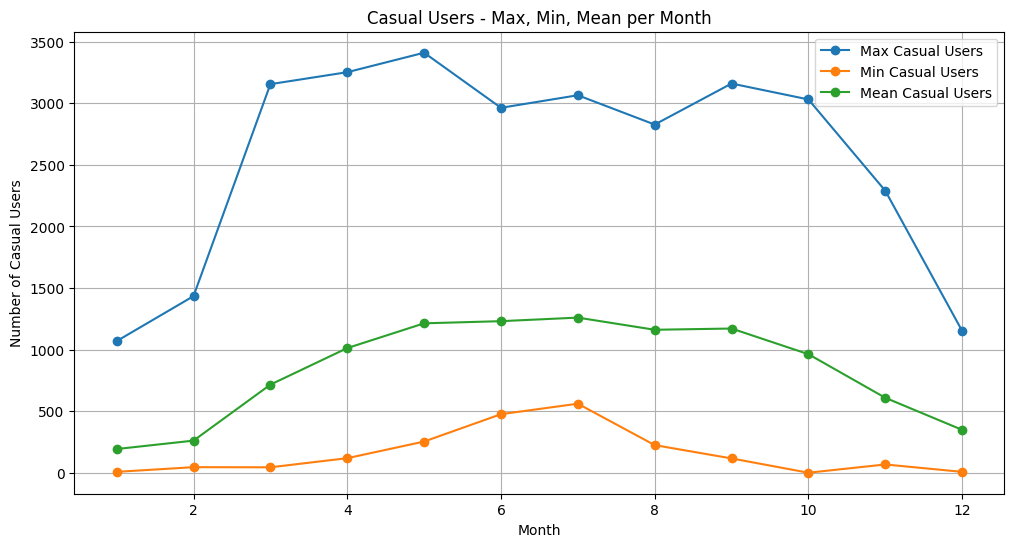

In [ ]:
# Plot 1: Max, Min, and Mean for Casual Users
plt.figure(figsize=(12, 6))
plt.plot(agg_data.index, agg_data['casual_max'], label='Max Casual Users', marker='o')
plt.plot(agg_data.index, agg_data['casual_min'], label='Min Casual Users', marker='o')
plt.plot(agg_data.index, agg_data['casual_mean'], label='Mean Casual Users', marker='o')
plt.title('Casual Users - Max, Min, Mean per Month')
plt.xlabel('Month')
plt.ylabel('Number of Casual Users')
plt.legend()
plt.grid(True)
plt.show()


Plot diatas akan menampilkan data max, min, mean dan std pada penyewaan casual.

Jika dilihat dari grafik yang ada penyewaan maximal mengalami peningkatan dari awal bulan hingga ke bulan 2-3 namun ada penurunan dibulan ke-6 lalu naik lagi dipertengahan bulan ke-6 dan kenaikan lagi dipertengahan 8 dan kembali menurun sampai bulan 12.
untuk Rata-ratanya kenaikan secara parabola dari 1 bulan dan mengalami penurunan dari 8 hingga seterusnya.

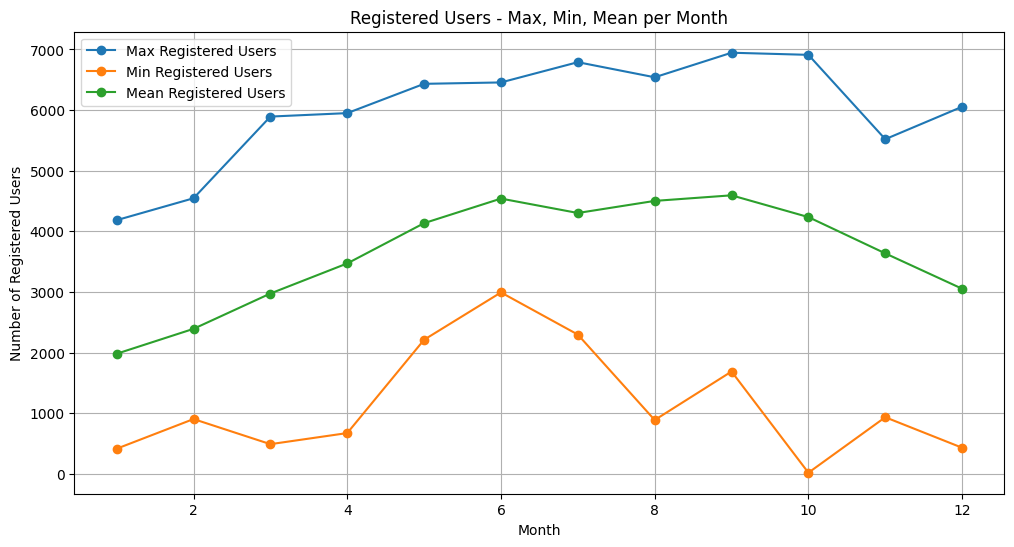

In [ ]:

# Plot 2: Max, Min, and Mean for Registered Users
plt.figure(figsize=(12, 6))
plt.plot(agg_data.index, agg_data['registered_max'], label='Max Registered Users', marker='o')
plt.plot(agg_data.index, agg_data['registered_min'], label='Min Registered Users', marker='o')
plt.plot(agg_data.index, agg_data['registered_mean'], label='Mean Registered Users', marker='o')
plt.title('Registered Users - Max, Min, Mean per Month')
plt.xlabel('Month')
plt.ylabel('Number of Registered Users')
plt.legend()
plt.grid(True)
plt.show()


Pada plot ini memiliki perbedaan dengan penyewaan casual. pada plot ini menampilkan yang sudah registrasi.
Gerakan grafik plot pada rata-rata seperti parabol mengalami kenaikian dipertengahan bulan namun mengalami penurunan di akhir bulan


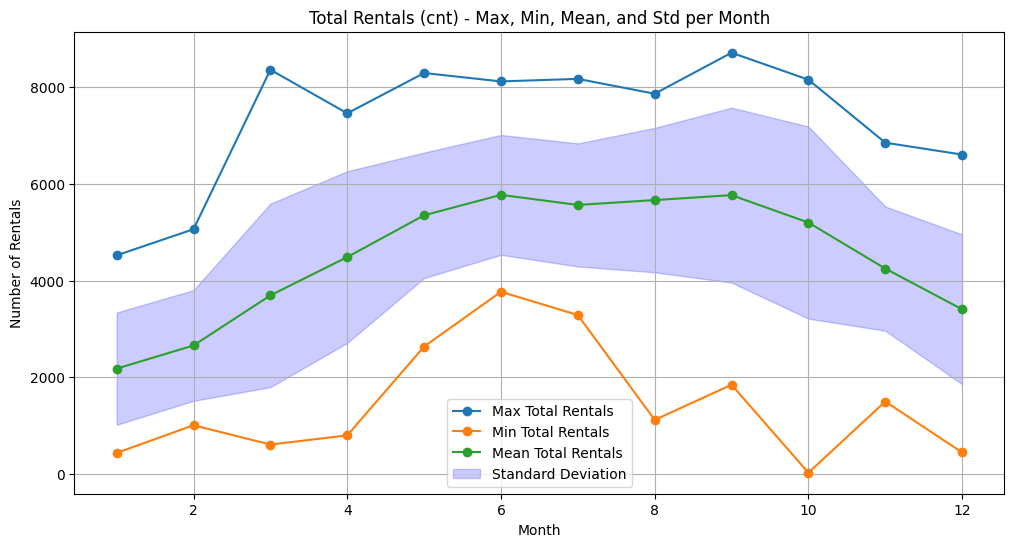

In [ ]:

# Plot 3: Max, Min, Mean, and Std for Total Rentals (cnt)
plt.figure(figsize=(12, 6))
plt.plot(agg_data.index, agg_data['cnt_max'], label='Max Total Rentals', marker='o')
plt.plot(agg_data.index, agg_data['cnt_min'], label='Min Total Rentals', marker='o')
plt.plot(agg_data.index, agg_data['cnt_mean'], label='Mean Total Rentals', marker='o')
plt.fill_between(agg_data.index, agg_data['cnt_mean'] - agg_data['cnt_std'], agg_data['cnt_mean'] + agg_data['cnt_std'],
                 color='b', alpha=0.2, label='Standard Deviation')
plt.title('Total Rentals (cnt) - Max, Min, Mean, and Std per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.legend()
plt.grid(True)
plt.show()

pada tampilan plot ini menampilkan plot dari total seluruh penyewaan.
Untuk rata-rata peminjaman menyentuh angka 2000 dibulan awal naik hingga hampir menyentuh angka 6000 dibulan ke 6 hingga bulan pertengahan 9

**Pertanyaan 2**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


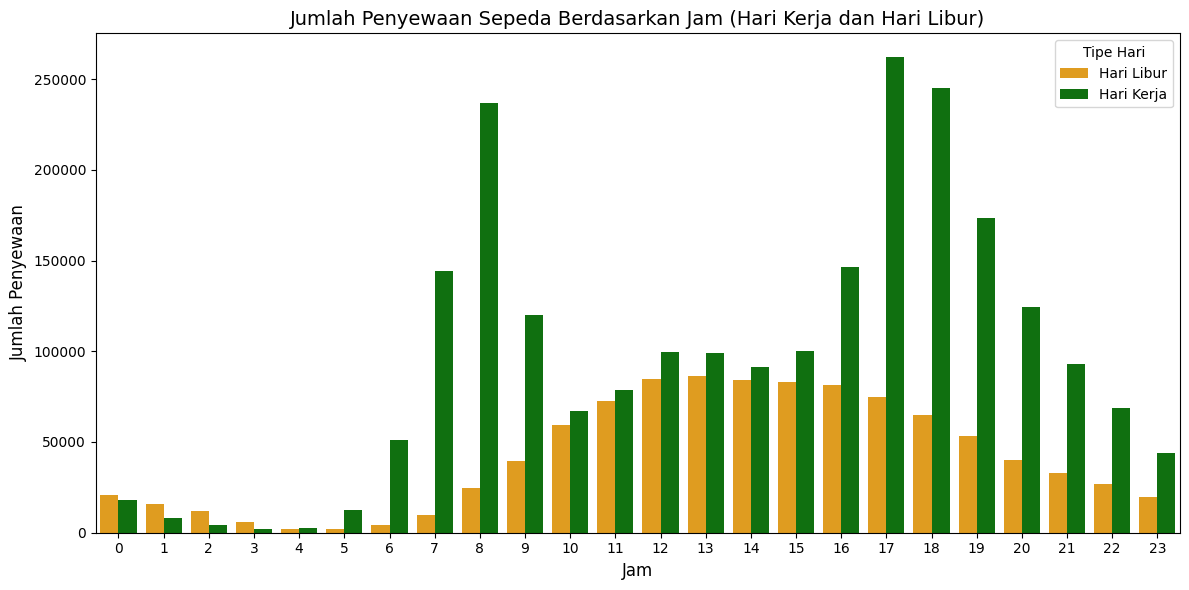

In [ ]:

# Misalkan hours_df adalah dataframe yang sudah ada
# Grouping data berdasarkan jam dan hari kerja (workingday)
hourly_rentals = hours_df.groupby(['hr', 'workingday']).agg({
    'cnt': 'sum'  # Menghitung total penyewaan per jam
}).reset_index()

# Mengubah nilai 'workingday' menjadi label
hourly_rentals['day_type'] = hourly_rentals['workingday'].map({0: 'Hari Libur', 1: 'Hari Kerja'})

# Membuat plot
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_rentals, x='hr', y='cnt', hue='day_type', palette=['orange', 'green'])

# Memberikan judul dan label pada plot
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Jam (Hari Kerja dan Hari Libur)', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.xticks(range(0, 24))  # Memberikan label pada sumbu x

# Menampilkan plot
plt.tight_layout()
plt.legend(title='Tipe Hari')
plt.show()


pada plot tersebut menampilkan informasi tentang penyewaan dilakukan jam berapa baik di hari libur maupun dihari kerja.
Berdasarkan plot yang dilihat bahwa peminjaman dilakukan dihari libur mengalami peningkatan dari jam 8 hingga akhirnya menurun dijam 11 malam. namun untuk hari kerja peningkatan penyewaan paling banyak di jam 6 pagi hingga jam 9 pagi dan naik lagi di jam 4 sore hingga menurun di jam 7 malam.




Program dibawah akan menampilkan pengaruh cuaca terhadap pemesanan sepeda

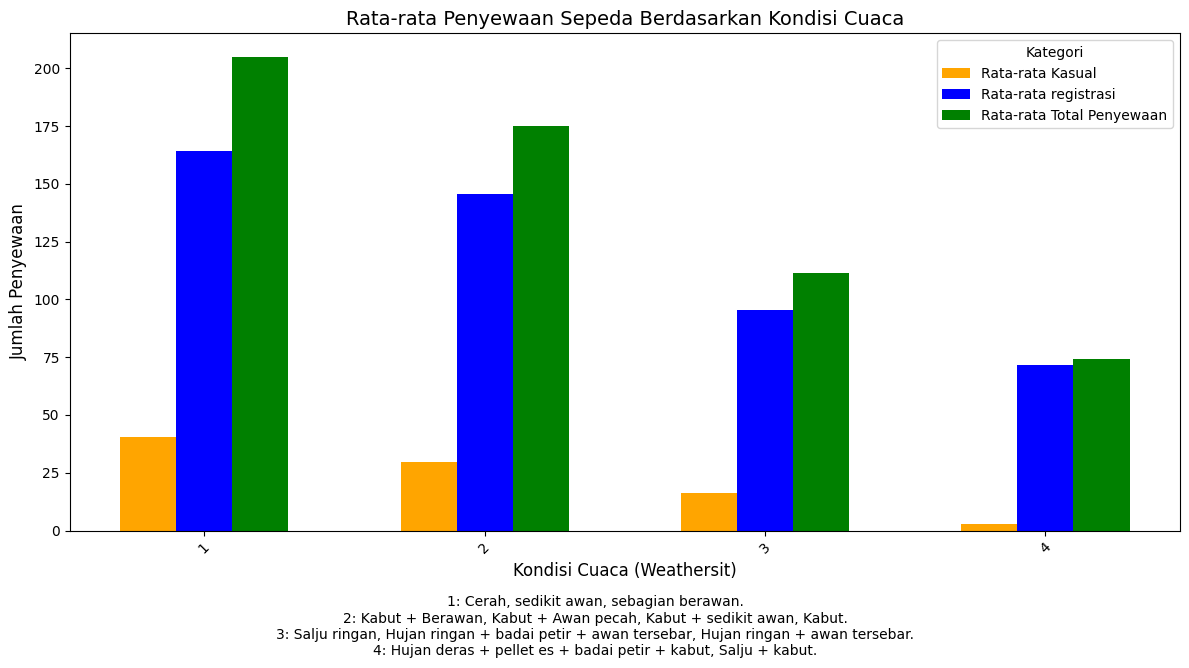

In [ ]:
# Menghitung agregasi berdasarkan kondisi cuaca (weathersit)
agg_weathersit = hours_df.groupby('weathersit').agg({
    "casual": ["max", "min", "mean"],
    "registered": ["max", "min", "mean"],
    "cnt": ["max", "min", "mean", "std"]
}).reset_index()

# Mengatur posisi bar
bar_width = 0.2
index = range(len(agg_weathersit))

# Membuat plot
plt.figure(figsize=(12, 6))

# Menambahkan bar untuk casual users
plt.bar(index, agg_weathersit[('casual', 'mean')], bar_width, label='Rata-rata Kasual', color='orange')
plt.bar([i + bar_width for i in index], agg_weathersit[('registered', 'mean')], bar_width, label='Rata-rata registrasi', color='blue')
plt.bar([i + 2 * bar_width for i in index], agg_weathersit[('cnt', 'mean')], bar_width, label='Rata-rata Total Penyewaan', color='green')

# Menambahkan label dan judul
plt.xlabel('Kondisi Cuaca (Weathersit)', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca', fontsize=14)
plt.xticks([i + bar_width for i in index], agg_weathersit['weathersit'], rotation=45)
plt.legend(title='Kategori')

plt.figtext(0.5, -0.1,
            "1: Cerah, sedikit awan, sebagian berawan.\n"
            "2: Kabut + Berawan, Kabut + Awan pecah, Kabut + sedikit awan, Kabut.\n"
            "3: Salju ringan, Hujan ringan + badai petir + awan tersebar, Hujan ringan + awan tersebar.\n"
            "4: Hujan deras + pellet es + badai petir + kabut, Salju + kabut.",
            ha='center', fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()


Pada Plot tersebut terdapat perbedaan pada penyewaan sepeda. dari angka 1 hingga angka 4. baik dari registred maupun casual dan total pengalami penurunan yang sama.

# Kesimpulan

# No. 1

-  Ada perbedaan dari max, mean, dan min. max, mean dan minimalnya registred jauh lebih tinggi. bisa dikatakan bahwa untuk penyewaan registred setiap bulannya memiliki angka lebih tinggi dibandingkan yang casual.
-  Gerakan visualisasi plot mengalami kenaikan diawal bulan namun mengalami penurunan diakhir bulan. baik itu penyewa casual maupun registrai dan total penyewaan.


# No 2
-  dapat diliihat bahwa penyewaan sepeda dihari kerja mengalami peningkatan dijam masuk kerja dan pada pulang kerja. Sehingga dapat dikatakan bahwa orang sering menyewa sepeda sebagai transportasi untuk pergi kerja atau mengantar anak kesekolah
-  Penyewaan dihari libur mulai mengalami peningkatan pada jam 8 dan kembali menurun disore hari.
-  dari grafik dapat dilihat bahwa pemesanan paling banyak dilakukan pada hari kerja. Namun ketika tengah malam masih lebih banyak pada hari libur

# No 3
-  Kondisi cuaca sangat mempengaruhi penyewaan sepeda baik secara total maupun casual dan registred.
saat kondisi ekstrim atau bersalju kabut dan lainnya pemesanan mengalami penurunan sedangkan saat cuaca cerah penyewaan sepeda tinggi
